In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load results.csv
df = pd.read_csv('results.csv')

# Clean and convert columns to appropriate types
numeric_cols = ['resultId', 'raceId', 'driverId', 'constructorId', 'grid', 
                'positionOrder', 'points', 'laps', 'milliseconds', 'fastestLap', 
                'rank', 'statusId']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remove rows with missing critical fields
df = df.dropna(subset=['driverId', 'raceId'])


In [3]:
# Generate descriptive statistics
print("\nDescriptive Statistics for Key Columns:")
desc_stats = df[['points', 'positionsLost', 'laps', 'fastestLapTime']].describe()
print(desc_stats)

# Additional statistics
print("\nNumber of unique drivers:", df['driverId'].nunique())
print("Number of unique constructors:", df['constructorId'].nunique())
print("Number of races:", df['raceId'].nunique())
print("Number of seasons:", df['season'].nunique())


Descriptive Statistics for Key Columns:
             points  positionsLost          laps
count  26759.000000   26759.000000  26759.000000
mean       1.987632      -1.191263     46.301768
std        4.351209       8.374144     29.496557
min        0.000000     -20.000000      0.000000
25%        0.000000      -5.000000     23.000000
50%        0.000000       0.000000     53.000000
75%        2.000000       4.000000     66.000000
max       50.000000      20.000000    200.000000

Number of unique drivers: 861
Number of unique constructors: 211
Number of races: 1125
Number of seasons: 12


In [11]:
# Feature engineering
df['positionsLost'] = df['grid'] - df['positionOrder']  # Positive means gained, negative means lost
df['finished'] = df['statusId'].isin([1, 11, 12, 13, 14])  # Assume these indicate finished races
df['season'] = df['raceId'] // 100 + 2000  # Approximate season from raceId
df['decade'] = (df['season'] // 10) * 10

In [12]:
# Handle outliers in positionsLost
df['positionsLost'] = df['positionsLost'].clip(lower=-20, upper=20)

In [14]:
print("Data Info:")
print(df.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26759 non-null  int64  
 1   raceId           26759 non-null  int64  
 2   driverId         26759 non-null  int64  
 3   constructorId    26759 non-null  int64  
 4   number           26759 non-null  object 
 5   grid             26759 non-null  int64  
 6   position         26759 non-null  object 
 7   positionText     26759 non-null  object 
 8   positionOrder    26759 non-null  int64  
 9   points           26759 non-null  float64
 10  laps             26759 non-null  int64  
 11  time             26759 non-null  object 
 12  milliseconds     7680 non-null   float64
 13  fastestLap       8252 non-null   float64
 14  rank             8510 non-null   float64
 15  fastestLapTime   26759 non-null  object 
 16  fastestLapSpeed  26759 non-null  object 
 17  s

In [15]:
print("\nFirst few rows:")
print(df.head())


First few rows:
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  ...  milliseconds fastestLap  rank  \
0            1              1    10.0  ...     5690616.0       39.0   2.0   
1            2              2     8.0  ...     5696094.0       41.0   3.0   
2            3              3     6.0  ...     5698779.0       41.0   5.0   
3            4              4     5.0  ...     5707797.0       58.0   7.0   
4            5              5     4.0  ...     5708630.0       43.0   1.0   

   fastestLapTime  fastestLapSpeed statusId positionsLost  finished  season  \
0        1:27.452   

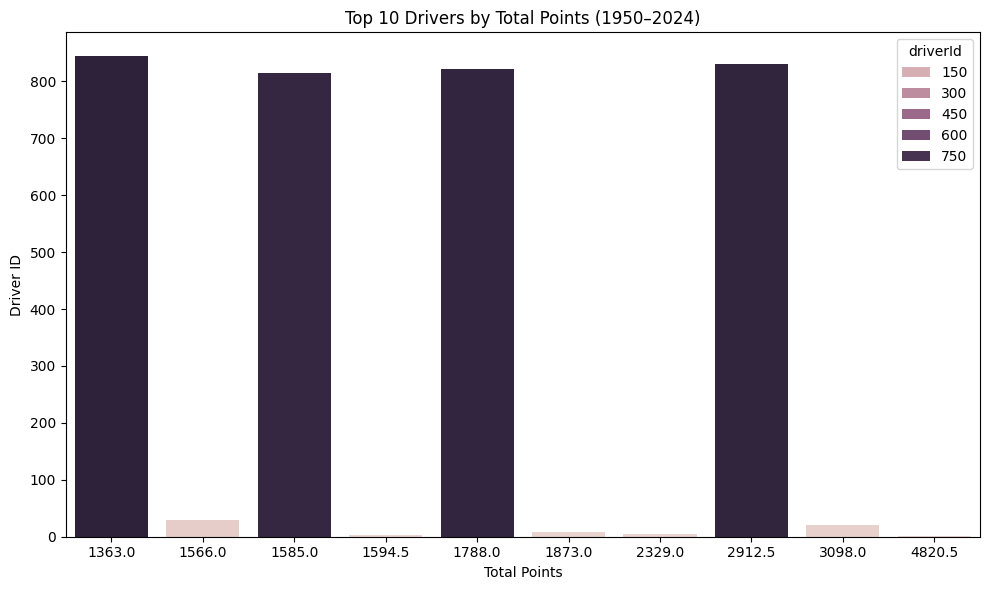

In [20]:
# Aggregate total points per driver
driver_points = df.groupby('driverId')['points'].sum().reset_index()
top_10_drivers = driver_points.sort_values(by='points', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='points', y='driverId', hue='driverId', data=top_10_drivers)
plt.title('Top 10 Drivers by Total Points (1950–2024)')
plt.xlabel('Total Points')
plt.ylabel('Driver ID')
plt.tight_layout()
plt.show()


In [ ]:
print("Top 10 Drivers by Total Points:")
print(top_10_drivers.to_string(index=False))



Top 10 Drivers by Total Points:
 driverId  points
        1  4820.5
       20  3098.0
      830  2912.5
        4  2329.0
        8  1873.0
      822  1788.0
        3  1594.5
      815  1585.0
       30  1566.0
      844  1363.0


In [18]:
# Aggregate points and starts per constructor
constructor_stats = df.groupby('constructorId').agg({
    'points': 'sum',
    'raceId': 'count'
}).rename(columns={'raceId': 'starts'})
constructor_stats['pointsPerStart'] = constructor_stats['points'] / constructor_stats['starts']
top_teams = constructor_stats.sort_values(by='pointsPerStart', ascending=False).head(10)

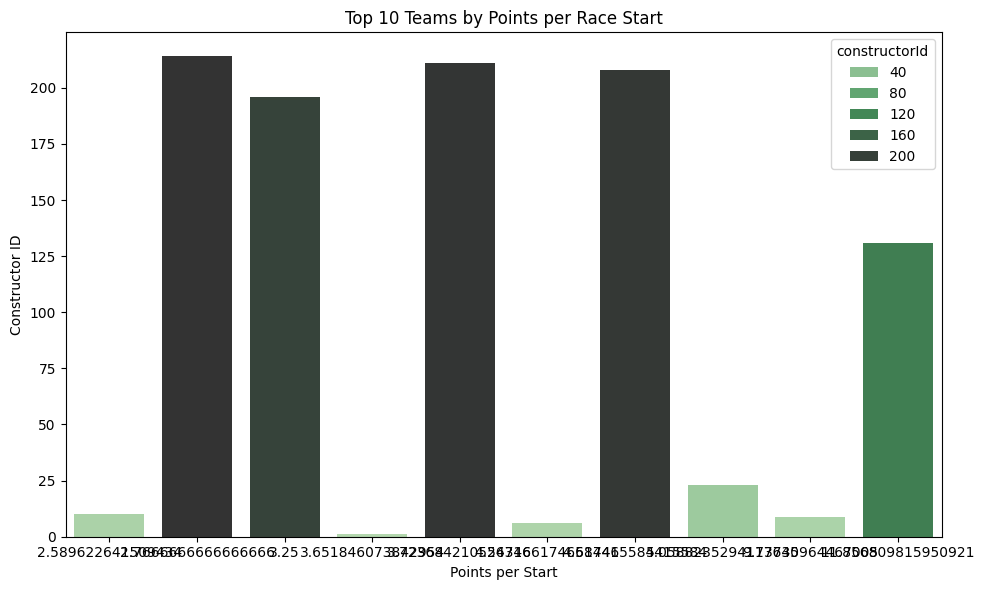

In [19]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='pointsPerStart', y='constructorId', hue='constructorId', data=top_teams, palette='Greens_d')
plt.title('Top 10 Teams by Points per Race Start')
plt.xlabel('Points per Start')
plt.ylabel('Constructor ID')
plt.tight_layout()
plt.show()


In [21]:
# Print results
print("Top 10 Teams by Points per Race Start:")
print(top_teams[['points', 'starts', 'pointsPerStart']].to_string(index=False))


Top 10 Teams by Points per Race Start:
  points  starts  pointsPerStart
 7730.64     652       11.856810
 7673.00     788        9.737310
  172.00      34        5.058824
  706.00     154        4.584416
11091.27    2439        4.547466
  283.00      76        3.723684
 7022.50    1923        3.651846
  130.00      40        3.250000
  498.00     180        2.766667
 1098.00     424        2.589623


In [22]:
# Calculate DNF rate per season
season_stats = df.groupby('season').agg({
    'finished': lambda x: x.count() - x.sum(),  # Count DNFs
    'raceId': 'count'
}).rename(columns={'finished': 'dnfs', 'raceId': 'total'})
season_stats['dnfRate'] = season_stats['dnfs'] / season_stats['total']
top_dnf_season = season_stats.sort_values(by='dnfRate', ascending=False).head(1)

# Common DNF causes
dnf_causes = df[~df['finished']].groupby('statusId').size().reset_index(name='count')
# Map assumed status codes (based on typical F1 data)
status_mapping = {
    1: 'Finished', 3: 'Accident', 4: 'Collision', 5: 'Engine', 6: 'Gearbox',
    7: 'Transmission', 8: 'Clutch', 9: 'Hydraulics', 20: 'Mechanical'
}
dnf_causes['cause'] = dnf_causes['statusId'].map(status_mapping).fillna('Other')



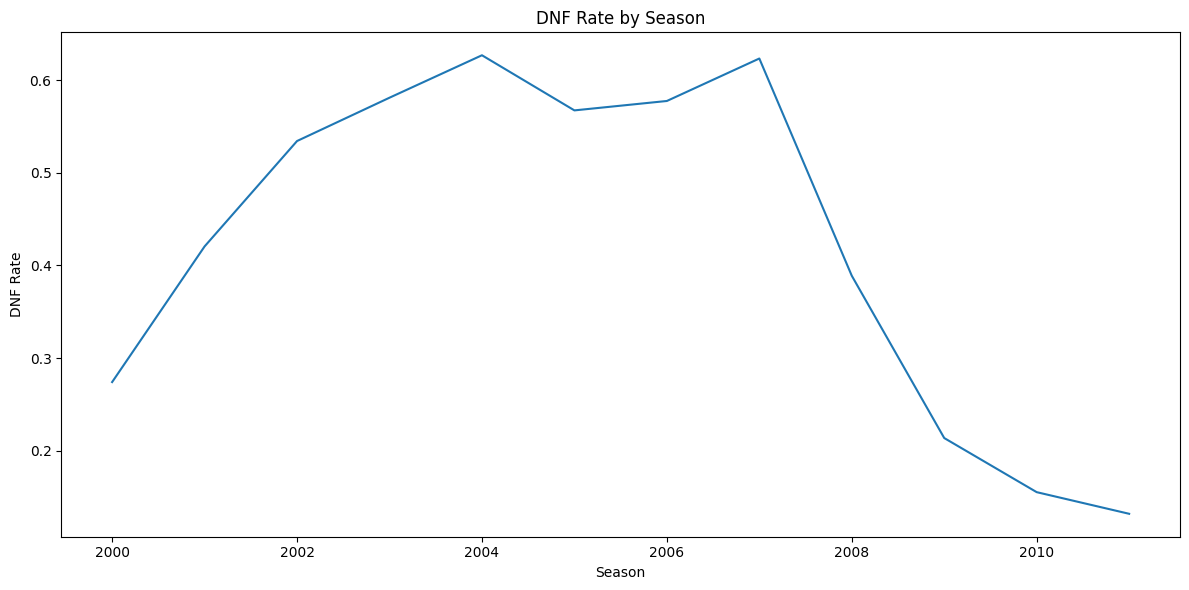

In [23]:
# Plot DNF rate
plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='dnfRate', data=season_stats.reset_index())
plt.title('DNF Rate by Season')
plt.xlabel('Season')
plt.ylabel('DNF Rate')
plt.tight_layout()
plt.show()


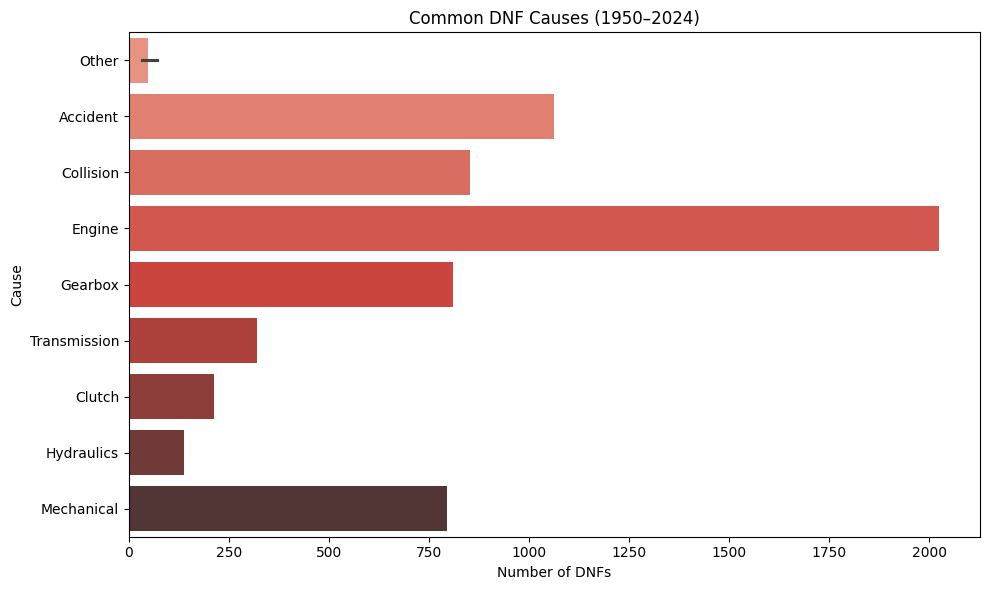

In [24]:
# Plot DNF causes
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='cause', hue='cause', data=dnf_causes, palette='Reds_d')
plt.title('Common DNF Causes (1950–2024)')
plt.xlabel('Number of DNFs')
plt.ylabel('Cause')
plt.tight_layout()
plt.show()


In [ ]:
# Print results
print("Season with Highest DNF Rate:")
print(top_dnf_season[['dnfs', 'total', 'dnfRate']].to_string())
print("Common DNF Causes:")
print(dnf_causes[['cause', 'count']].to_string(index=False))



Season with Highest DNF Rate:
        dnfs  total   dnfRate
season                       
2004    1723   2749  0.626773

Common DNF Causes:
       cause  count
       Other    147
    Accident   1062
   Collision    854
      Engine   2026
     Gearbox    810
Transmission    321
      Clutch    214
  Hydraulics    139
       Other    316
       Other    221
       Other    153
       Other    100
       Other     52
       Other     38
  Mechanical    795
       Other     44
       Other    431
       Other    254
       Other     61
       Other    133
       Other     29
       Other     55
       Other      1
       Other     41
       Other     25
       Other    107
       Other     35
       Other      5
       Other      9
       Other      1
       Other     88
       Other    111
       Other     48
       Other      5
       Other     11
       Other     11
       Other     19
       Other     30
       Other    124
       Other     17
       Other      3
       Other     32

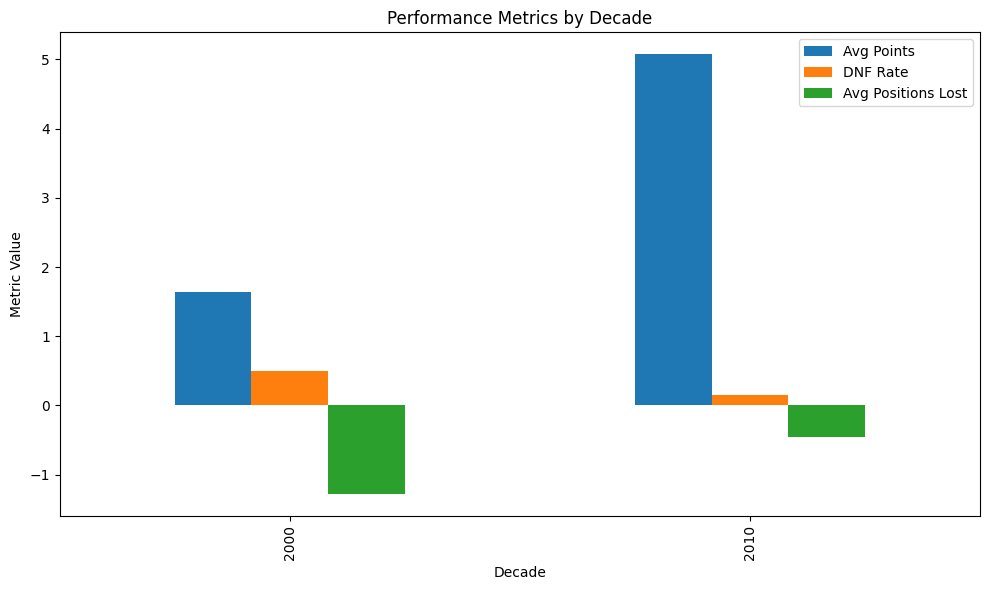


Performance by Decade:
        avgPoints   dnfRate  positionsLost
decade                                    
2000     1.632773  0.495458      -1.275292
2010     5.074484  0.147880      -0.460312

Insight: The 2020s show higher average points due to modern scoring systems, but DNF rates remain significant.


In [ ]:
# Aggregate metrics by decade
decade_stats = df.groupby('decade').agg({
    'points': 'mean',
    'finished': lambda x: 1 - x.mean(),  # DNF rate
    'positionsLost': 'mean'
}).rename(columns={'points': 'avgPoints', 'finished': 'dnfRate'})

# Plot
plt.figure(figsize=(10, 6))
decade_stats.plot(kind='bar', ax=plt.gca())
plt.title('Performance Metrics by Decade')
plt.xlabel('Decade')
plt.ylabel('Metric Value')
plt.legend(['Avg Points', 'DNF Rate', 'Avg Positions Lost'])
plt.tight_layout()
plt.show()

# Print results
print("\nPerformance by Decade:")
print(decade_stats.to_string())